In [2]:
from __future__ import absolute_import, division, print_function

In [1]:
import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay

# import Tensorflow and its other classes

In [3]:
import tensorflow as tf

In [4]:
tf.version.VERSION

'2.2.0'

In [5]:
from tf_agents.agents.dqn import dqn_agent

In [6]:
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

# Hyper-parameters

In [7]:
num_iterations = 20000 # @param {type:"integer"}

initial_collect_steps = 1000  # @param {type:"integer"} 
collect_steps_per_iteration = 1  # @param {type:"integer"}
replay_buffer_max_length = 100000  # @param {type:"integer"}

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
log_interval = 200  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

# Environment

In [8]:
env_name = 'CartPole-v0'
env = suite_gym.load(env_name)

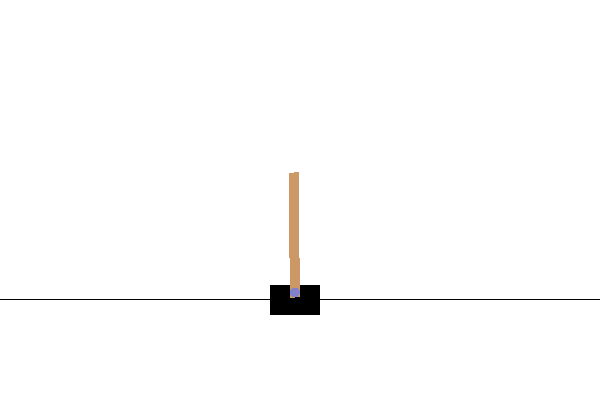

In [9]:

env.reset()
PIL.Image.fromarray(env.render())

# env.viewer.window.close()   To close any environment window

Print Observations, Actions, Rewards

In [15]:
print('Observation Spec:')
print(env.time_step_spec().observation)

print('Action Spec:')
print(env.action_spec())

print('Reward Spec:')
print(env.time_step_spec().reward)

Observation Spec:
BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])
Action Spec:
BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)
Reward Spec:
ArraySpec(shape=(), dtype=dtype('float32'), name='reward')


The **time_step_spec()** method returns the specification for the TimeStep tuple. Its observation attribute shows the shape of observations, the data types, and the ranges of allowed values